In [1]:
import numpy as np
import pandas as pd

In [2]:
Bdata=pd.read_csv(r"C:\Users\91741\Desktop\Great Lakes\3rd Residency\Project\Bank_Personal_Loan_Modelling-1.csv")

In [3]:
Bdata.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
Bdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [5]:
Bdata=Bdata.drop(['ID','ZIP Code'],axis=1)

In [6]:
Bdata[Bdata['Experience']<0].shape

(52, 12)

In [7]:
Bdata['Experience']=Bdata['Experience'].apply(lambda x:0 if x<0 else x)

In [8]:
Bdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.119600,11.440484,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


In [9]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [10]:
#Since bank will be benifitted by loans and credit card. I want to see the distribution based on Loans as well as Credit card.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


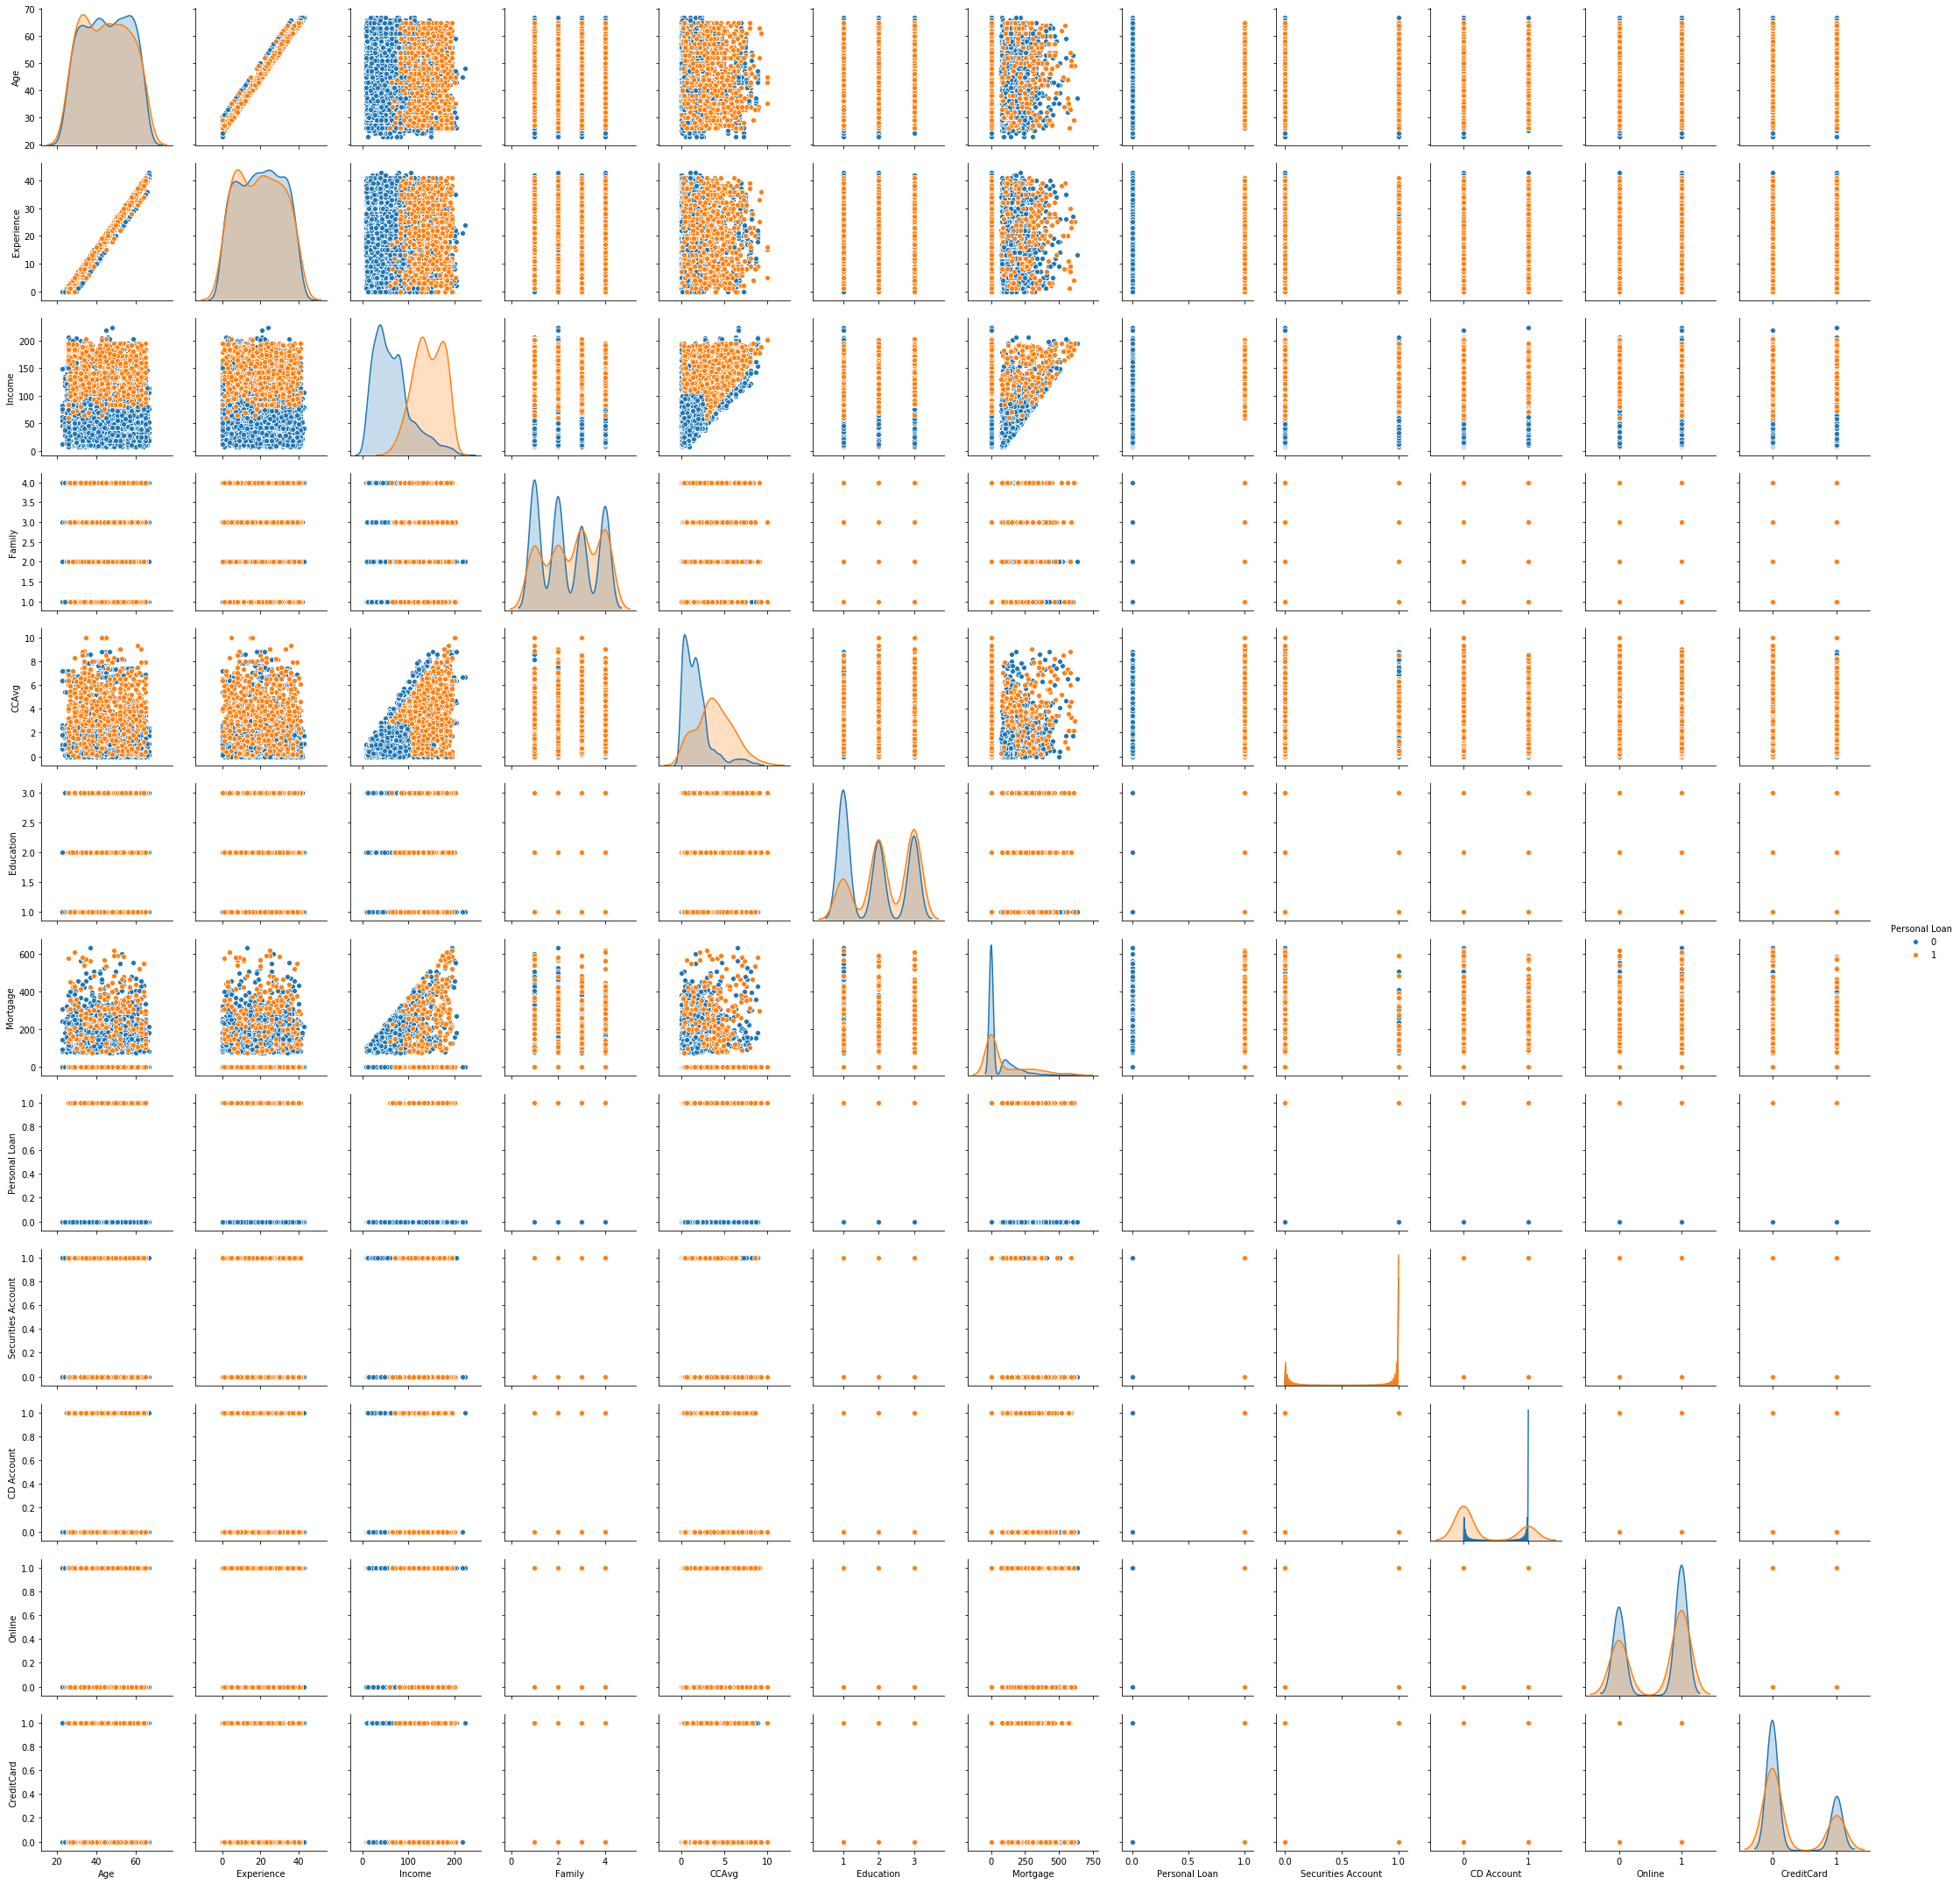

In [11]:
sns.pairplot(Bdata,diag_kind='kde',hue='Personal Loan')

In [12]:
#Income and CCAvg are good features.
#But income is better attribute than CCAvg since graph for Income is more separable.
#Experience and age are highly correlated. We can consider any one of the attributes.
#

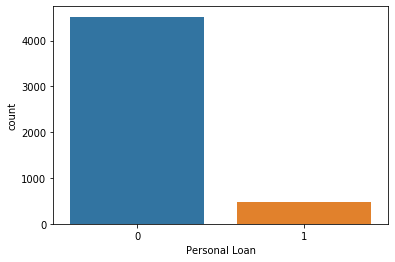

In [13]:
sns.countplot(x='Personal Loan',data=Bdata)

In [14]:
X=Bdata.drop('Personal Loan',axis=1)
Y=Bdata['Personal Loan']

In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.30,random_state=10)

In [16]:
from  sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
Scaler.fit(xtrain)
xtrain=Scaler.transform(xtrain)
xtest=Scaler.transform(xtest)

# Naive bayes

In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score,classification_report,confusion_matrix
Model = GaussianNB()
Model.fit(xtrain,ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [18]:
ypredict=Model.predict(xtest)
TrainaccuracyNB=Model.score(xtrain,ytrain)
print(TrainaccuracyNB)
TestaccuracyNB=Model.score(xtest,ytest)
print(TestaccuracyNB)

0.8834285714285715
0.88


In [19]:
print(classification_report(ytest,ypredict))
print(confusion_matrix(ytest,ypredict))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1360
           1       0.40      0.61      0.49       140

    accuracy                           0.88      1500
   macro avg       0.68      0.76      0.71      1500
weighted avg       0.91      0.88      0.89      1500

[[1235  125]
 [  55   85]]


# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
ModelLog=LogisticRegression()
ModelLog.fit(xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
YLogpredict=ModelLog.predict(xtest)
TrainaccuracyLog=ModelLog.score(xtrain,ytrain)
print(TrainaccuracyLog)
TestaccuracyLog=ModelLog.score(xtest,ytest)
print(TestaccuracyLog)

0.9505714285714286
0.9526666666666667


In [22]:
from sklearn.metrics import f1_score,classification_report,confusion_matrix
print(f1_score(ytest,YLogpredict))
print("\n")
print(confusion_matrix(ytest,YLogpredict))
print("\n")
print(classification_report(ytest,YLogpredict))

0.7171314741035857


[[1339   21]
 [  50   90]]


              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1360
           1       0.81      0.64      0.72       140

    accuracy                           0.95      1500
   macro avg       0.89      0.81      0.85      1500
weighted avg       0.95      0.95      0.95      1500



# KNN

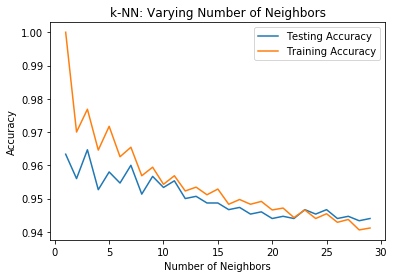

In [23]:
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1,30)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    Scaler=StandardScaler()
    scaledxtrain = Scaler.fit_transform(xtrain)
    scaledxtest = Scaler.transform(xtest)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaledxtrain,ytrain)
    #Compute accuracy on the training set
    train_accuracy_plot[i] = knn.score(scaledxtrain,ytrain)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = knn.score(scaledxtest,ytest)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [24]:
#Taking K=14,since testing accuracy is maximum.

In [25]:
knn=KNeighborsClassifier(n_neighbors=14)
Scaler.fit(xtrain)
scaledxtrain = Scaler.transform(xtrain)
scaledxtest = Scaler.transform(xtest)
knn.fit(scaledxtrain,ytrain)
print("What is the Testing Accuracy")
print(knn.score(scaledxtest,ytest))
print("What is the Training Accuracy")
print(knn.score(scaledxtrain,ytrain))
predicted = knn.predict(scaledxtest)
print(confusion_matrix(ytest,predicted))
print(confusion_matrix(ytest,predicted)[1,0])

What is the Testing Accuracy
0.9486666666666667
What is the Training Accuracy
0.9511428571428572
[[1357    3]
 [  74   66]]
74


#Logistic regression model is giving more accuracy(95.2.1%) than other two. KNN is close to Logistic(94.8%).
reason - Logistic is best model for this data set because difference between test and train accuracy is lesser than KNN.

